3.2

In [38]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
%matplotlib inline
import numpy as np

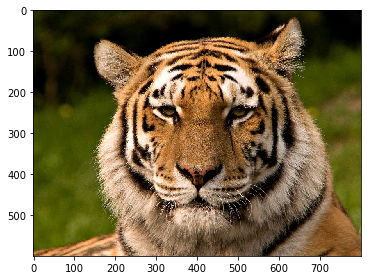

In [39]:
img = imread('tiger-color.png')
imshow(img)

In [40]:
img_f = img_as_float(img)

In [41]:
YUV = img_f.copy()
YUV[:,:,0] = img_f[:,:,0]*0.2126 + img_f[:,:,1]*0.7152 + img_f[:,:,2]*0.0722 #Y
YUV[:,:,1] = -img_f[:,:,0]*0.0999 - img_f[:,:,1]*0.3360 + img_f[:,:,2]*0.4360 #U
YUV[:,:,2] = img_f[:,:,0]*0.6150 - img_f[:,:,1]*0.5586 - img_f[:,:,2]*0.0563 #V

Y = YUV[:,:,0]

In [42]:
# Создание гистограммы, для каждого цвета считается количество пикселей
hist_dict = {}
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        if Y[i][j] in hist_dict:
            hist_dict[Y[i][j]] += 1
        else:
            hist_dict[Y[i][j]] = 1

In [43]:
x_min, x_max, count = 0, 0, 0
k = round(Y.size*0.05)
# Срезается 5%
list_keys = list(hist_dict.keys())
list_keys.sort()
# Поиск минимального
for i in list_keys:
    count += hist_dict[i]
    if count > k:
        x_min = i
        break
#Поиск максимального
count = 0
list_keys.sort(reverse = True)
for i in list_keys:
    count += hist_dict[i]
    if count > k:
        x_max = i
        break

In [44]:
Y = (Y - x_min) / (x_max - x_min) # Применяется формула к каналу Y

In [45]:
Y = np.clip(Y, 0, 1) # Все значения меньше нуля и больше 1 приравниваются к ним
YUV[:,:,0] = Y

In [46]:
# Перевод из YUV в RGB3
img_f[:,:,0] = YUV[:,:,0] + 1.2803 * YUV[:,:,2]
img_f[:,:,1] = YUV[:,:,0] - 0.2148 * YUV[:,:,1]  - 0.3805 * YUV[:,:,2]
img_f[:,:,2] = YUV[:,:,0] + 2.1279 * YUV[:,:,1]

In [47]:
img_f = np.clip(img_f, 0, 1)

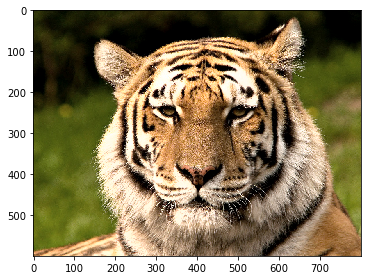

In [48]:
imshow(img_f)